In [1]:
spark

In [3]:
query_data = spark.read.json('/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=Mobile/Kind=Query/Year=2019/Month=07/Day=05')
click_data = spark.read.json('/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=Mobile/Kind=Click/Year=2019/Month=07/Day=05')

In [4]:
import json
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from matplotlib import font_manager, rc
query_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=Mobile/Kind=Query/Year=2019/Month=07/Day=05'
click_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=Mobile/Kind=Click/Year=2019/Month=07/Day=05'

In [5]:
def preprocessing(data):
    data1 = data.filter(data.inflow_channel == "i")
    data2 = data1.filter(data.tabcode == "tot")
    data3 = data2.select("query").collect()
    #totalQuery = data3.count()
    return data3#, totalQuery

In [6]:
refined_query_data = preprocessing(query_data)

In [133]:
query_ranking = Counter(refined_query_data)
total = sum(query_ranking.values())
topTen = query_ranking.most_common(10)
topHund = query_ranking.most_common(100)
topThousand = query_ranking.most_common(1000)
topTenThousand = query_ranking.most_common(10000)
topHundThousand = query_ranking.most_common(100000)

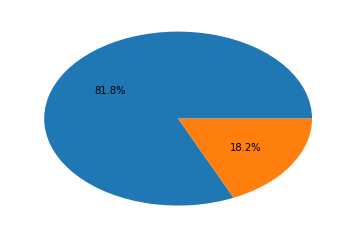

In [8]:
cnt = 0
for meta in topTen:
    cnt += meta[1]
    
plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

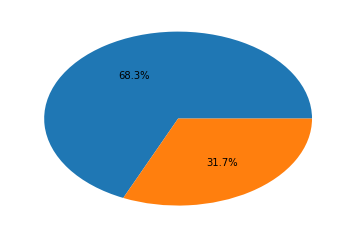

In [9]:
cnt = 0

for meta in topHund:
    cnt += meta[1]

plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

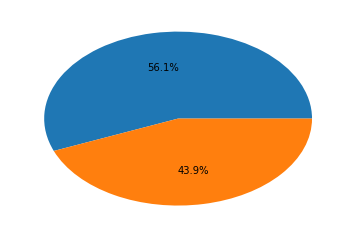

In [10]:
cnt = 0
for meta in topThousand:
    cnt += meta[1]
    
plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

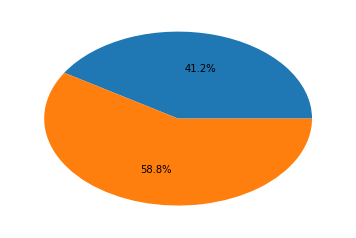

In [11]:
cnt = 0
for meta in topTenThousand:
    cnt += meta[1]
    
plt.pie([total-cnt, cnt], autopct='%1.1f%%')
plt.show()

In [12]:
hour = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18",
       "19","20","21","22","23"]
def getTopTen(data):
    data = data.select("query").collect()
    data = Counter(data).most_common(10)
    return data
    
    
for h in hour:
    print ("--"+h+"시--")
    click_data = spark.read.json(click_path+"/Hour="+h)
    click_data = click_data.filter(click_data.inflow_channel == "i")
    click_data = click_data.filter(click_data.tabcode == "tot")
    topTen = getTopTen(click_data)
    for meta in topTen:
        collection = click_data.filter(click_data.query == meta[0].query).select("collection").collect()
        mostFrequent = Counter(collection).most_common(1)
        print (meta[0].query+" :"+mostFrequent[0][0].collection.code)
        
    print ("-------")
    

--00시--
폭스 테리어 :3DV
강아랑 :QPD
오늘의 운세 :UNS
봄밤 :TVP
운세 :UNS
유튜브 :0DL
이형철 :NNS
홍석주 :QPD
굿 메리지 :QPD
날씨 :Z8T
-------
--01시--
폭스 테리어 :3DV
강아랑 :QPD
오늘의 운세 :UNS
이재욱 :PRF
강형욱 :NNS
유튜브 :0DL
이규연의 스포트라이트 :NNS
봄밤 :TVP
운세 :UNS
정선아 :QPD
-------
--02시--
폭스테리어 :3DV
폭스 테리어 :3DV
이재욱 :PRF
강형욱 :NNS
오늘의 운세 :UNS
강아랑 :QPD
유튜브 :0DL
지승현 :PRF
길찾기 :FWT
이다희 :QPD
-------
--03시--
폭스테리어 :3DV
이재욱 :QPD
미국 지진 :NNS
강형욱 :NNS
오늘의 운세 :UNS
강아랑 :QPD
유튜브 :0DL
손정의 :QPD
지승현 :QPD
전국 날씨 :Z8T
-------
--04시--
폭스테리어 :3DV
미국 지진 :NNS
강아랑 :NNS
오늘의 운세 :UNS
날씨 :Z8T
손정의 :QPD
전국 날씨 :Z8T
강형욱 :NNS
이시언 :NNS
유튜브 :0DL
-------
--06시--
폭스테리어 :3DV
미국 지진 :NNS
날씨 :Z8T
김보미 :NNS
오늘의 운세 :UNS
강형욱 :NNS
손정의 :QPD
전국 날씨 :Z8T
이시언 :NNS
길찾기 :FWT
-------
--07시--
폭스테리어 :3DV
미국 지진 :NNS
날씨 :Z8T
김보미 :NNS
강형욱 :NNS
국립백두대간 수목원 :QPD
손정의 :QPD
전국 날씨 :Z8T
오늘의 운세 :UNS
길찾기 :FWT
-------
--08시--
폭스테리어 :3DV
전국날씨 :Z8T
손정의 :QPD
이현영 화가 :QPD
장도연 :QPD
날씨 :Z8T
미국 지진 :NNS
길찾기 :FWT
일본 불매운동 :NNS
오늘의 운세 :UNS
-------
--09시--
왕종근 :NNS
폭스테리어 :3DV
최병서 :QPD
길찾기 :FWT
신예은 :QPD
전국날씨 :Z8T
날씨 :Z8T


In [139]:
# divide into section
n = 0
while n < 100000:
    print (n)
    for i in range(n, n+10):
        collection = click_data.filter(click_data.query == topHundThousand[i][0].query).select("collection").collect()
        mostFrequent = Counter(collection).most_common(1)
        print (topHundThousand[i][0].query+" :"+mostFrequent[0][0].collection.code)
        
    print ("-------")
    if n == 0:
        n += 1
    n *= 10

0
도경완 :NNS
잠원동 건물붕괴 :NNS
폭스테리어 :3DV
다나 :NNS
일본 불매운동 :NNS
현아 :NNS
미국 지진 :NNS
유튜브 :0DL
강형욱 :NNS
법무법인 금성 :NNS
-------
10
목동 화재 :NNS
코오롱 티슈진 :1CI
네이버 :0DL
이의정 :MLC
오신환 :PRF
손정의 :NNS
왕종근 :PRF
우정노조 :NNS
날씨 :Z8T
강아랑 :PRF
-------
100
홍석주 :TWA
김무성 :NNS
프로야구 순위 :ABT
지도 :FWT
지하철 노선도 :0SP
유튜브 동영상 :0DL
오늘날씨 :Z8T
백지연 아나운서 :PRF
다음 카페 :QTQ
원더 :QPD
-------
1000
김어준 뉴스공장 :P3T
코레일 :0DL
삼성물산 주가 :NSJ
춘천 레고랜드 :NNS
송혜교 송중기 :NNS
마사회 경마정보 :0DL
크루핸즈온 승무원준비 단기특강 :SBC
송중기 탈모사진 :NNS
부산날씨 :Z8T
옥수수 삶는 방법 :RP2
-------
10000
인천지하철 노선도 :0SP
정웅인 :PRF
버블티 :1DV
토토디스크 :VST
닭발 양념 매콤 레시피 :RP1
스테이크 맛있게 굽는법 :TWA
강지영 아나운서 :MLC
라라랜드 :N2V
천사의나팔꽃 :1DV
마리몬드 :0DL
-------
